<a href="https://colab.research.google.com/github/shree1019/Credit-card-churn-prediction-using-ann/blob/main/Creditcardchurnprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [43]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [45]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [46]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [47]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)


In [48]:
x = df.drop(columns=['Exited'])
y = df['Exited'].values

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_trf = sc.fit_transform(x_train)
x_test_trf = sc.transform(x_test)

In [51]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [52]:
model = Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
history = model.fit(x_train,y_train,batch_size=50,epochs=100,verbose = 1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2060 - loss: 1.1474 - val_accuracy: 0.2031 - val_loss: 0.7966
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3608 - loss: 0.7293 - val_accuracy: 0.7969 - val_loss: 0.5887
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.5654 - val_accuracy: 0.7969 - val_loss: 0.5213
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7890 - loss: 0.5193 - val_accuracy: 0.7969 - val_loss: 0.5013
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.5000 - val_accuracy: 0.7969 - val_loss: 0.4988
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.4996 - val_accuracy: 0.7969 - val_loss: 0.4976
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8045 - loss: 0.4894 - val_accuracy: 0.7969 - val_loss: 0.4973
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.4973 - val_accu

In [56]:
y_pred = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [57]:
y_pred

array([[0.24149694],
       [0.24430119],
       [0.23257421],
       ...,
       [0.24437663],
       [0.23257421],
       [0.24149694]], dtype=float32)

In [58]:
y_pred = y_pred.argmax(axis=-1)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

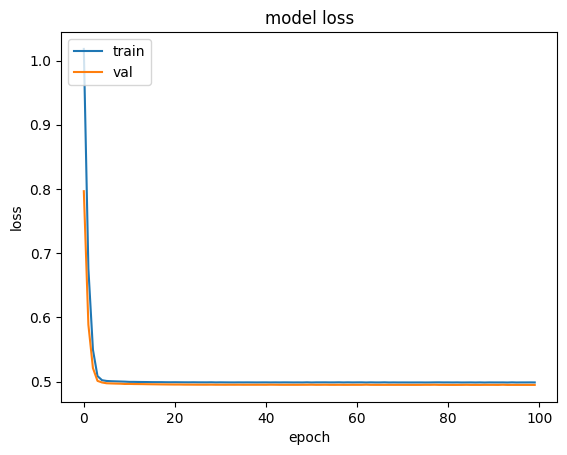

In [61]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

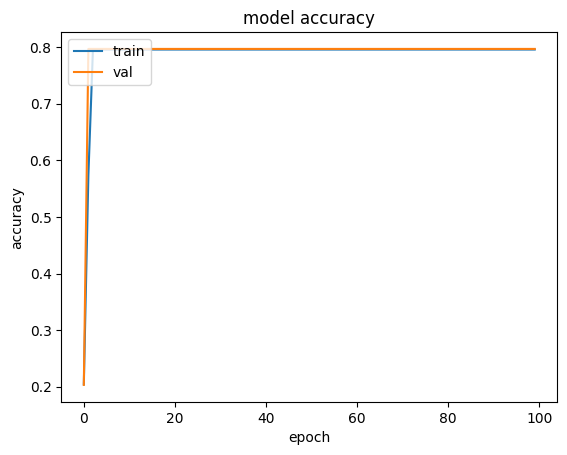

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()